### 3D plots demo in matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[-5.    -4.975 -4.95  -4.925 -4.9   -4.875 -4.85  -4.825 -4.8   -4.775
 -4.75  -4.725 -4.7   -4.675 -4.65  -4.625 -4.6   -4.575 -4.55  -4.525 -4.5
 -4.475 -4.45  -4.425 -4.4   -4.375 -4.35  -4.325 -4.3   -4.275 -4.25
 -4.225 -4.2   -4.175 -4.15  -4.125 -4.1   -4.075 -4.05  -4.025]
[-5.    -4.975 -4.95  -4.925 -4.9   -4.875 -4.85  -4.825 -4.8   -4.775
 -4.75  -4.725 -4.7   -4.675 -4.65  -4.625 -4.6   -4.575 -4.55  -4.525 -4.5
 -4.475 -4.45  -4.425 -4.4   -4.375 -4.35  -4.325 -4.3   -4.275 -4.25
 -4.225 -4.2   -4.175 -4.15  -4.125 -4.1   -4.075 -4.05  -4.025]
[[-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]
 [-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]
 [-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]
 ..., 
 [-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]
 [-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]
 [-5.    -4.975 -4.95  ..., -4.075 -4.05  -4.025]]
[[-5.    -5.    -5.    ..., -5.    -5.    -5.   ]
 [-4.975 -4.975 -4.975 ..., -4.975 -4.975 -4.975]
 [-4.95  -4.95  -4.95  ..., 

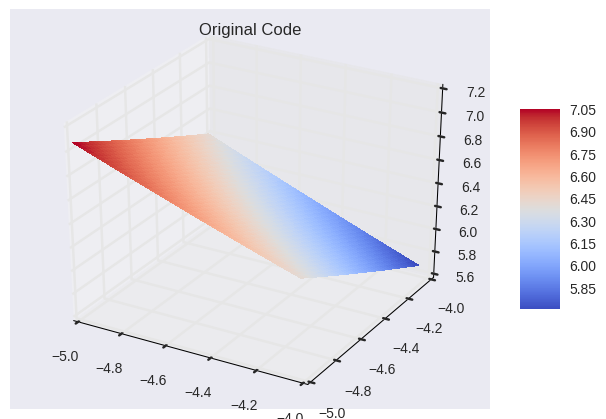

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, -4, 0.025)
Y = np.arange(-5, -4, 0.025)

print X
print Y
X,Y = np.meshgrid(X,Y)
print X
print Y
R = (X**2+Y**2)


Z = np.sqrt(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

dum="""
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

"""


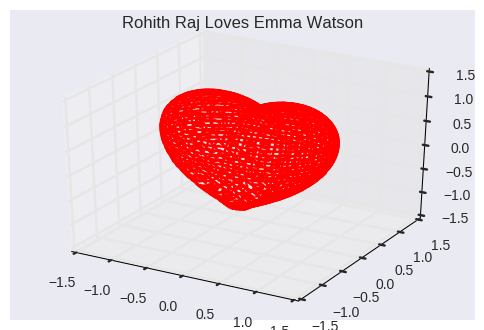

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


def heart_3d(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3


def plot_implicit(fn, bbox=(-1.5, 1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 40) # number of slices
    A1, A2 = np.meshgrid(A, A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('r',))
        # [z] defines the only level to plot
        # for this contour for this value of z

    for y in B:  # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red',))

    for x in B: # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    ax.set_title("Rohith Raj Loves Emma Watson")

    plt.show()
    
plot_implicit(heart_3d)


[ 30.97000318  29.1968255   31.32754768  26.69786881  30.05514124
  24.5121485   31.04385026  24.29451298  27.65459179  26.82743524
  25.23707983  26.48003575  28.09727055  30.57171103  25.50412035
  24.39201894  30.93579691  23.87431566  24.86798125  29.84518111
  29.22594526  31.61955093  25.70400218  30.88626263  30.54599383
  28.36252692  31.51088953  30.55852672  30.39050235  26.10619275
  28.52569524  25.89796838  27.03005337  29.90665953  31.04418547
  28.31411355  29.48981211  27.83849233  30.20862694  23.53741829
  31.09165985  25.39653582  24.74805386  25.06327736  30.61363355
  28.00859228  28.16370258  29.8763803   27.54482156  26.65084652
  23.10829874  27.69049667  25.16424695  25.03765421  29.69330224
  30.59057138  26.48153429  30.80980838  27.90162787  27.98089322
  31.66199776  31.99783262  24.2250144   24.74316336  23.9841081
  25.85319915  28.76707134  30.84070963  27.08401233  24.18584245
  23.40270118  29.27687394  31.27873227  28.99604237  29.96250641
  29.639789

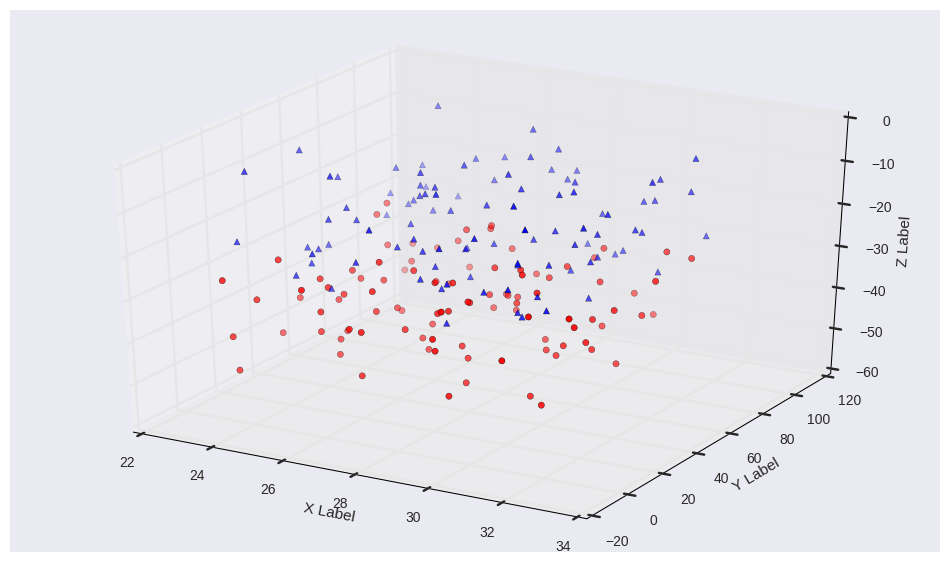

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)
    
print xs
print ys
print zs

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()